In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/flight-price-prediction/business.csv
/kaggle/input/flight-price-prediction/economy.csv
/kaggle/input/flight-price-prediction/Clean_Dataset.csv


# Data Processing

In [2]:
file_path = "../input/flight-price-prediction/Clean_Dataset.csv"
df = pd.read_csv(file_path)

In [3]:
# Import libraries that are required for machine learning later
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestClassifier

# Data Cleaning and Manipulation

In [4]:
df.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [5]:
df.tail()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
300148,300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585
300152,300152,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,81585


In [6]:
df.isnull().sum()

Unnamed: 0          0
airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

In [7]:
df.drop("Unnamed: 0", axis = 1, inplace = True)

In [8]:
df.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [9]:
df.describe()

,duration,days_left,price
count,300153.000000,300153.000000,300153.000000
mean,12.221021,26.004751,20889.660523
std,7.191997,13.561004,22697.767366
min,0.830000,1.000000,1105.000000
25%,6.830000,15.000000,4783.000000
50%,11.250000,26.000000,7425.000000
75%,16.170000,38.000000,42521.000000
max,49.830000,49.000000,123071.000000


In [10]:
df.shape

(300153, 11)

In [11]:
df.info

<bound method DataFrame.info of          airline   flight source_city departure_time stops   arrival_time  \
0       SpiceJet  SG-8709       Delhi        Evening  zero          Night   
1       SpiceJet  SG-8157       Delhi  Early_Morning  zero        Morning   
2        AirAsia   I5-764       Delhi  Early_Morning  zero  Early_Morning   
3        Vistara   UK-995       Delhi        Morning  zero      Afternoon   
4        Vistara   UK-963       Delhi        Morning  zero        Morning   
...          ...      ...         ...            ...   ...            ...   
300148   Vistara   UK-822     Chennai        Morning   one        Evening   
300149   Vistara   UK-826     Chennai      Afternoon   one          Night   
300150   Vistara   UK-832     Chennai  Early_Morning   one          Night   
300151   Vistara   UK-828     Chennai  Early_Morning   one        Evening   
300152   Vistara   UK-822     Chennai        Morning   one        Evening   

       destination_city     class  duration

In [12]:
df.isnull().any()

airline             False
flight              False
source_city         False
departure_time      False
stops               False
arrival_time        False
destination_city    False
class               False
duration            False
days_left           False
price               False
dtype: bool

There is no missing value in the dataset, so we don't need to do any preprocessing and cleaning to the data itself.

In [13]:
df.columns

Index(['airline', 'flight', 'source_city', 'departure_time', 'stops',
       'arrival_time', 'destination_city', 'class', 'duration', 'days_left',
       'price'],
      dtype='object')

In [14]:
# For the convenience of future model, we need to change some strings into number
df.replace(to_replace = "zero", value = 0, inplace=True)
df.replace(to_replace = "one", value = 1, inplace=True)
# For convenience, we set the value of "two_or_more" as 2
df.replace(to_replace = "two_or_more", value = 2, inplace=True)
df['stops'].value_counts()

1    250863
0     36004
2     13286
Name: stops, dtype: int64

In [15]:
df.replace(to_replace = "Economy", value = 0, inplace=True)
df.replace(to_replace = "Business", value = 1, inplace=True)
df['class'].value_counts()

0    206666
1     93487
Name: class, dtype: int64

In [16]:
df[df["price"] == df["price"].max()]

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
261377,Vistara,UK-772,Kolkata,Morning,1,Night,Delhi,1,13.5,3,123071


In [17]:
df[df["price"] == df["price"].min()]

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
203807,AirAsia,I5-517,Chennai,Morning,0,Morning,Hyderabad,0,1.17,16,1105
203808,GO_FIRST,G8-505,Chennai,Evening,0,Evening,Hyderabad,0,1.25,16,1105
203908,AirAsia,I5-517,Chennai,Morning,0,Morning,Hyderabad,0,1.17,17,1105
203909,GO_FIRST,G8-505,Chennai,Evening,0,Evening,Hyderabad,0,1.25,17,1105
204003,AirAsia,I5-517,Chennai,Morning,0,Morning,Hyderabad,0,1.17,18,1105
...,...,...,...,...,...,...,...,...,...,...,...
206601,Indigo,6E-7261,Chennai,Morning,1,Evening,Hyderabad,0,7.92,49,1105
206602,Indigo,6E-611,Chennai,Evening,1,Late_Night,Hyderabad,0,8.25,49,1105
206603,Indigo,6E-581,Chennai,Morning,1,Evening,Hyderabad,0,9.17,49,1105
206604,Indigo,6E-7127,Chennai,Afternoon,1,Night,Hyderabad,0,9.50,49,1105


In [18]:
df.airline.unique()

array(['SpiceJet', 'AirAsia', 'Vistara', 'GO_FIRST', 'Indigo',
       'Air_India'], dtype=object)

# Exploratory Data Analysis (Visualization)

First, we may want to know what is the price range for each airline? Some airlines may be generally cheaper or more expensive than others.

Text(0, 0.5, 'Flight price')

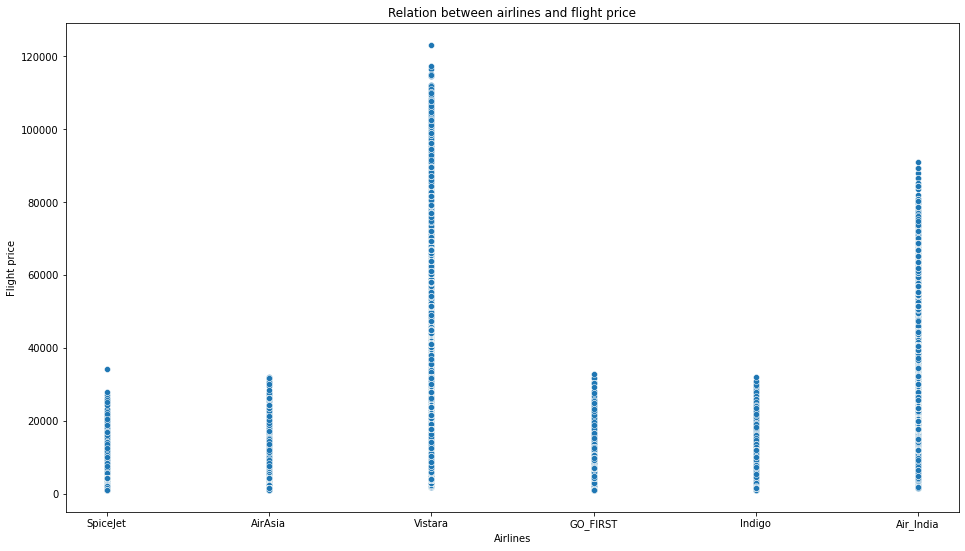

In [19]:
plt.figure(figsize = (16, 9))
sns.scatterplot(x = df["airline"], y = df["price"])
plt.title("Relation between airlines and flight price")
plt.xlabel("Airlines")
plt.ylabel("Flight price")

The graph tells us that for SpiceJet, AirAsia, GO_FIRST and Indigo, the price of their flights are all under 40000, while Vistara and Air India has a wider price range, up to more than 120000 and 90000 respectively. We confirm this by running following codes.

In [20]:
airline = df.airline.unique()
for i in range(0,6):
    print("There are a total of", df[df["airline"] == airline[i]].airline.count(), "entries in this dataset for", airline[i])
    print("The minimum flight price for SpiceJet is", df[df["airline"] == airline[i]].price.min())
    print("The maximum flight price for SpiceJet is", df[df["airline"] == airline[i]].price.max())
    print("\n")

There are a total of 9011 entries in this dataset for SpiceJet
The minimum flight price for SpiceJet is 1106
The maximum flight price for SpiceJet is 34158


There are a total of 16098 entries in this dataset for AirAsia
The minimum flight price for SpiceJet is 1105
The maximum flight price for SpiceJet is 31917


There are a total of 127859 entries in this dataset for Vistara
The minimum flight price for SpiceJet is 1714
The maximum flight price for SpiceJet is 123071


There are a total of 23173 entries in this dataset for GO_FIRST
The minimum flight price for SpiceJet is 1105
The maximum flight price for SpiceJet is 32803


There are a total of 43120 entries in this dataset for Indigo
The minimum flight price for SpiceJet is 1105
The maximum flight price for SpiceJet is 31952


There are a total of 80892 entries in this dataset for Air_India
The minimum flight price for SpiceJet is 1526
The maximum flight price for SpiceJet is 90970




Text(0.5, 1.0, 'Relation between days left and flight price')

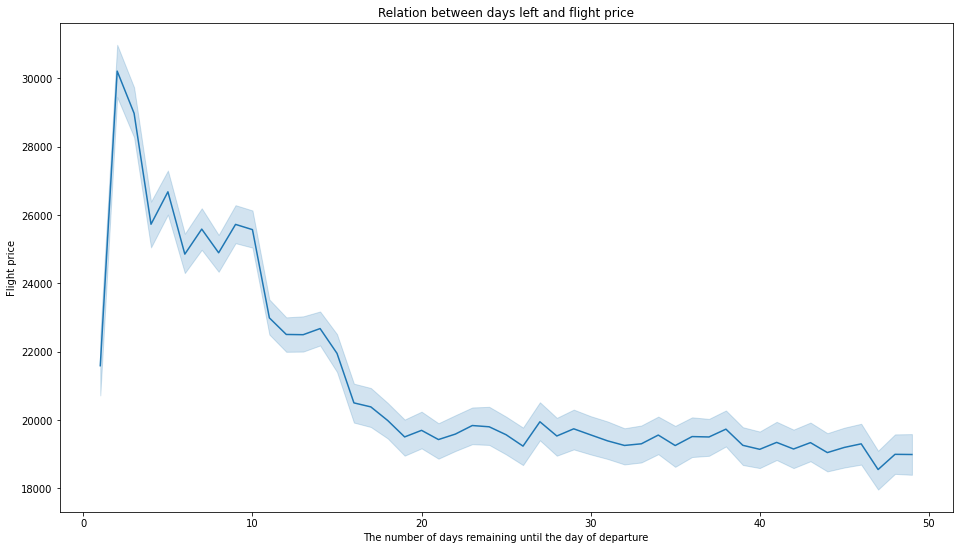

In [21]:
# We then want to see the relation between days left and the flight price.
plt.figure(figsize = (16, 9))
sns.lineplot(x = df["days_left"], y = df["price"])
plt.xlabel("The number of days remaining until the day of departure")
plt.ylabel("Flight price")
plt.title("Relation between days left and flight price")

From the above graph, we find that as time approaches the departure day, the price of the flight increases, but also drops dramatically when there are only 2 or 3 days left before deparrture. We can also note that when there are only 3 days left, the price range of air tickets is larger.

Text(0.5, 1.0, 'Relation between days left and flight price of Economy Class')

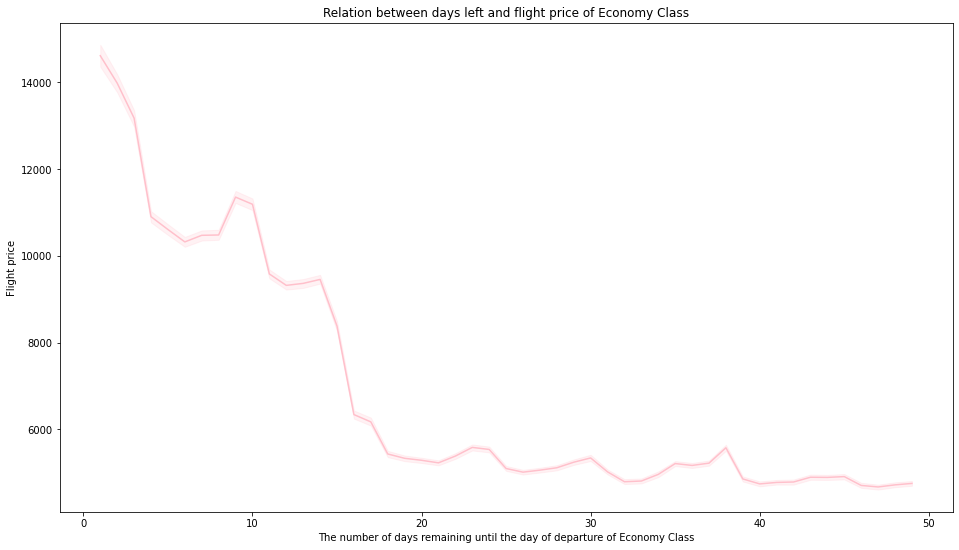

In [22]:
# We may want to explora the trend in terms of economy class
plt.figure(figsize = (16, 9))
economy = df[df["class"] == 0]
sns.lineplot(x = economy["days_left"], y = economy["price"], color = "pink")
plt.xlabel("The number of days remaining until the day of departure of Economy Class")
plt.ylabel("Flight price")
plt.title("Relation between days left and flight price of Economy Class")

Text(0.5, 1.0, 'Relation between days left and flight price of Business Class')

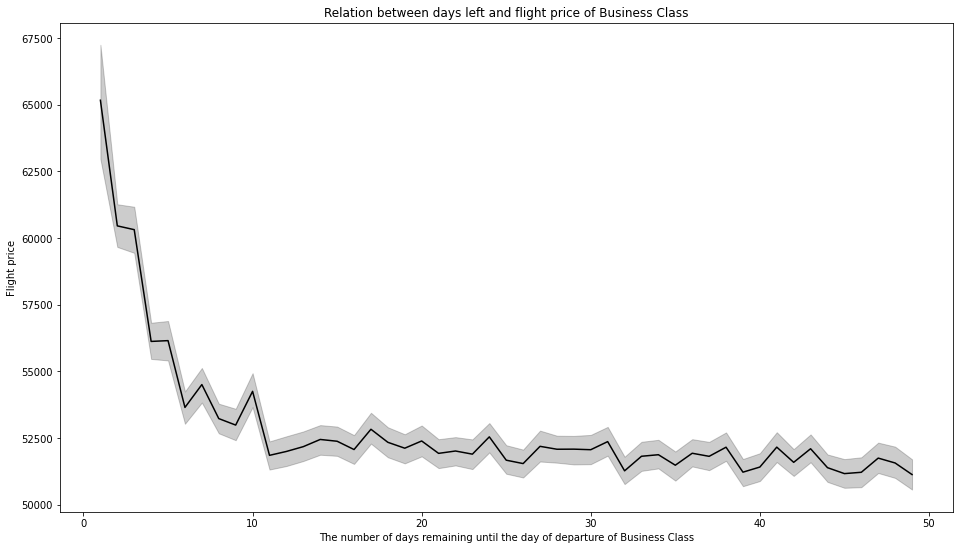

In [23]:
# What about business class?
plt.figure(figsize = (16, 9))
business = df[df["class"] == 1]
sns.lineplot(x = business["days_left"], y = business["price"], color = "black")
plt.xlabel("The number of days remaining until the day of departure of Business Class")
plt.ylabel("Flight price")
plt.title("Relation between days left and flight price of Business Class")

Text(0.5, 1.0, 'Relation between duration and flight price')

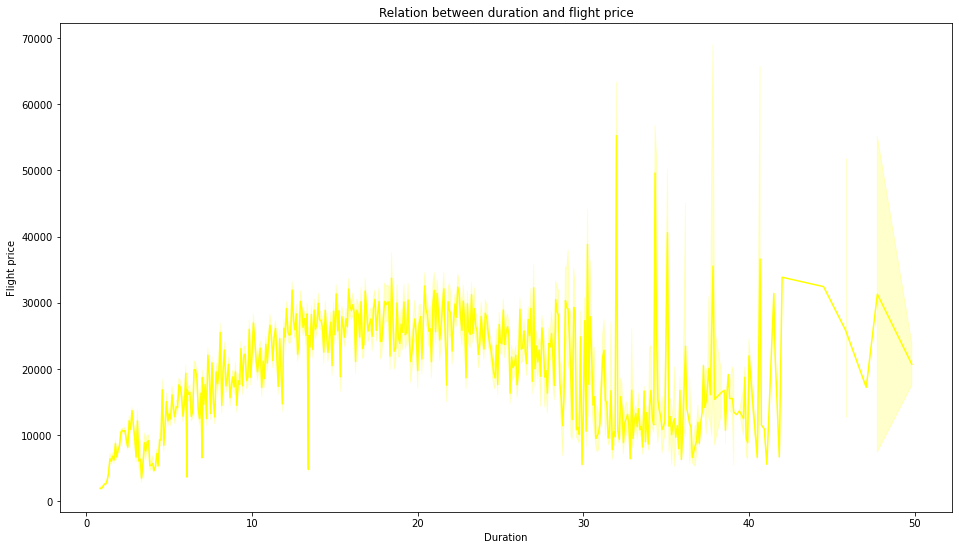

In [24]:
plt.figure(figsize = (16, 9))
sns.lineplot(x = df["duration"], y = df["price"], color = "yellow")
plt.xlabel("Duration")
plt.ylabel("Flight price")
plt.title("Relation between duration and flight price")

It is hard to say the relation between duration and flight price since it is also related to the number of stops of the whole flight.

Text(0, 0.5, 'Flight price')

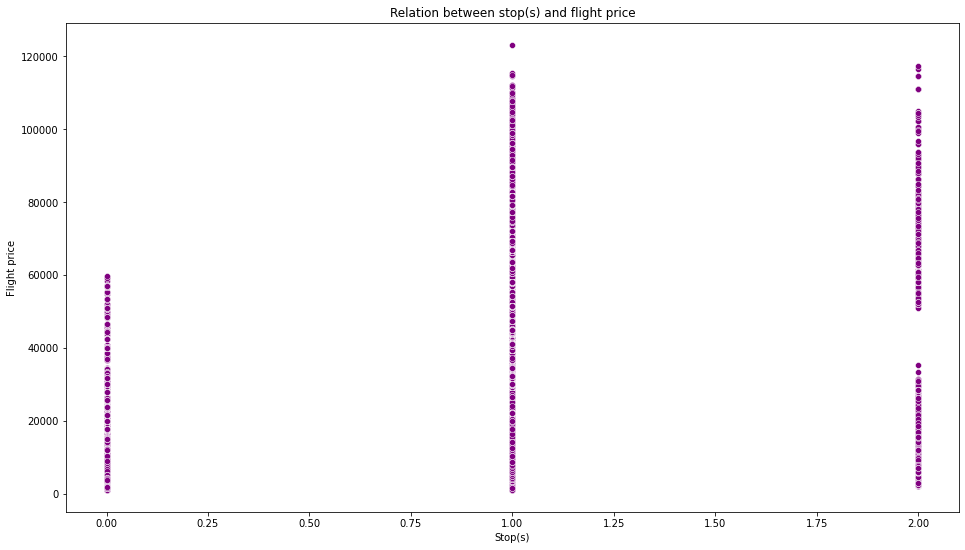

In [25]:
plt.figure(figsize = (16, 9))
sns.scatterplot(x = df["stops"], y = df["price"], color = "purple")
plt.title("Relation between stop(s) and flight price")
plt.xlabel("Stop(s)")
plt.ylabel("Flight price")
# Notice that 2 stops refers to two or more stops in the data

We can see that the price of direct flights (0 stop) has a lower price range than those with more than 1 stop.

Text(0, 0.5, 'Flight price')

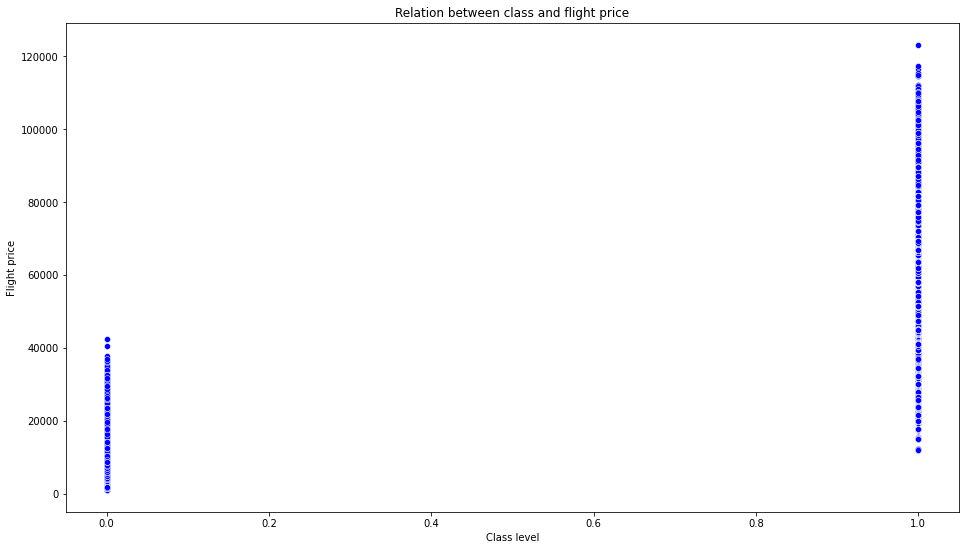

In [26]:
plt.figure(figsize = (16, 9))
sns.scatterplot(x = df["class"], y = df["price"], color = "blue")
plt.title("Relation between class and flight price")
plt.xlabel("Class level")
plt.ylabel("Flight price")
# Recap that 0 refers to economy class and 1 refers to business class that we have set previously

In this case, the class of economy ranges from 0 to 50000 and the class of business ranges from around 18000 to more than 120000. There is an overlap when the price ranges from around 20000 to approximately 40000. We may wonder why it happens or if the business ones have shorter distance or duration than that of economic class.

Text(0, 0.5, 'Flight price')

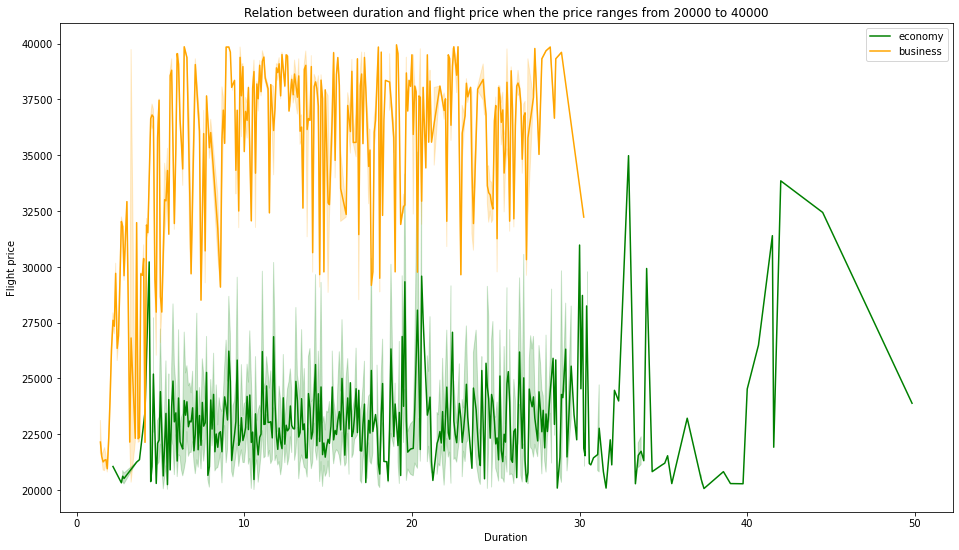

In [27]:
data1 = df[df["price"] >= 20000]
data = data1[data1["price"] <= 40000]
eco = data[data["class"] == 0]
bus = data[data["class"] == 1]
plt.figure(figsize = (16, 9))
sns.lineplot(x = eco["duration"], y = eco["price"], color = "green", label = "economy")
sns.lineplot(x = bus["duration"], y = bus["price"], color = "orange", label = "business")
plt.title("Relation between duration and flight price when the price ranges from 20000 to 40000")
plt.xlabel("Duration")
plt.ylabel("Flight price")

The above graph tells us that in a similar price range, the duration of business class is shorter than that of economy in general.

What about the remaining days? 

Text(0, 0.5, 'Flight price')

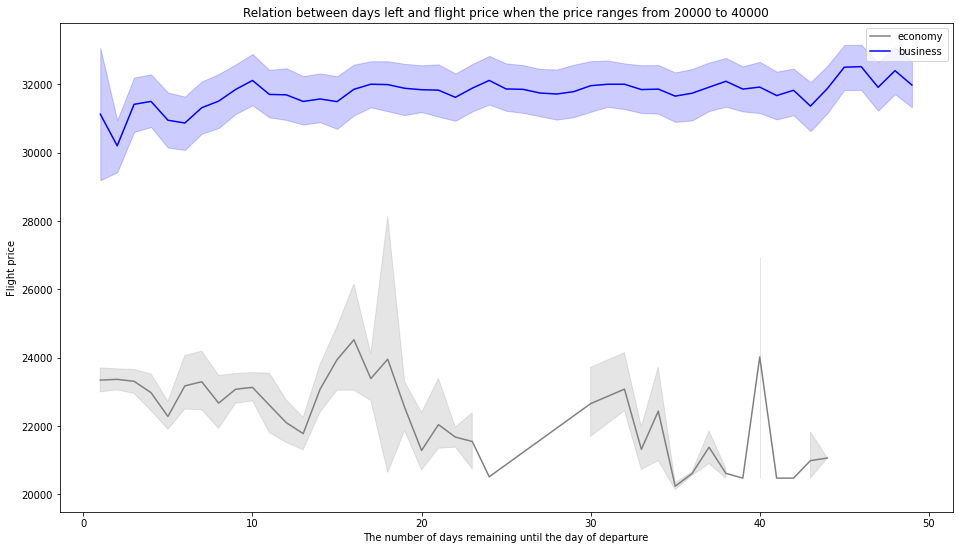

In [28]:
plt.figure(figsize = (16, 9))
sns.lineplot(x = eco["days_left"], y = eco["price"], color = "grey", label = "economy")
sns.lineplot(x = bus["days_left"], y = bus["price"], color = "blue", label = "business")
plt.title("Relation between days left and flight price when the price ranges from 20000 to 40000")
plt.xlabel("The number of days remaining until the day of departure")
plt.ylabel("Flight price")

In this range, the price of business class is much more stable and higher than that of economy, which means economy ones experience a fluctuation. In other words, the flight prices of business class don't change much over time.

How departure time affects flight price?

Text(0, 0.5, 'Flight price')

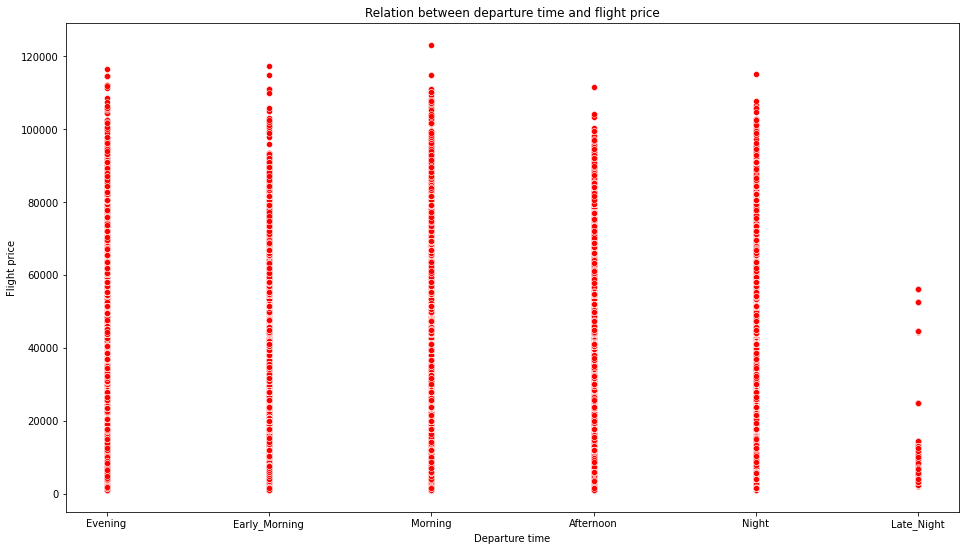

In [29]:
plt.figure(figsize = (16, 9))
sns.scatterplot(x = df["departure_time"], y = df["price"], color = "red")
plt.title("Relation between departure time and flight price")
plt.xlabel("Departure time")
plt.ylabel("Flight price")

When the flight departs in the evening, early morning, morning, afternoon or at night, they all have a similar price range, from 0 to aroung 120000; While for those depart at late night, the most expensive one is under 70000, much lower than other time slot.

If we break it down by airline, we can find the departure times of the cheapest tickets for each airline.

# Model

In the following codes, I would apply 3 ways to train the models, for which the absolute mean error would get smaller.

First, we would use DecisionTreeRegressor to train the model:

In [30]:
features = ['class', 'stops', 'duration', 'days_left']
X = df[features]
y = df.price
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 1)
model = DecisionTreeRegressor(random_state = 1)
model.fit(train_X, train_y)
predicted_price = model.predict(val_X)
mae = mean_absolute_error(val_y, predicted_price)
print(mae)

3718.581719366166


In [31]:
# Although there is no null value in each column (the data is clean), we can still apply imputation to ensure all values are normal
from sklearn.impute import SimpleImputer

my_imputer = SimpleImputer()
imputed_X_train = pd.DataFrame(my_imputer.fit_transform(train_X))
imputed_X_valid = pd.DataFrame(my_imputer.transform(val_X))

imputed_X_train.columns = train_X.columns
imputed_X_valid.columns = val_X.columns

model = DecisionTreeRegressor(random_state = 1)
model.fit(imputed_X_train, train_y)
preds = model.predict(imputed_X_valid)
mae = mean_absolute_error(val_y, preds)
print(mae)

3718.581719366166


Same result!

In [32]:
accuracy = model.score(val_X, val_y)
print("The accuracy by using Decision Forest Model is ", accuracy)

The accuracy by using Decision Forest Model is  0.9213902829728828


In [33]:
cols_with_missing = [col for col in train_X.columns
                     if train_X[col].isnull().any()]
print(cols_with_missing)

[]


In [34]:
missing_val_count_by_column = (train_X.isnull().sum())
print(missing_val_count_by_column[missing_val_count_by_column > 0])

Series([], dtype: int64)


We now have the mean absolute error that is around 3718, but we want a more accurate one. So we can acheieve this goal by finding the best tree size:

In [35]:
def get_mae(max_leaf_nodes, train_X, val_X, train_y, val_y):
    model = DecisionTreeRegressor(max_leaf_nodes=max_leaf_nodes, random_state = 1)
    model.fit(train_X, train_y)
    preds_val = model.predict(val_X)
    mae = mean_absolute_error(val_y, preds_val)
    return(mae)

In [36]:
nums = [5, 50, 500, 5000]
for max_leaf_nodes in nums:
    my_mae = get_mae(max_leaf_nodes, train_X, val_X, train_y, val_y)
    print("Max leaf nodes: %d  \t | \t Mean Absolute Error:  %d" %(max_leaf_nodes, my_mae))

Max leaf nodes: 5  	 | 	 Mean Absolute Error:  3799
Max leaf nodes: 50  	 | 	 Mean Absolute Error:  3410
Max leaf nodes: 500  	 | 	 Mean Absolute Error:  3297
Max leaf nodes: 5000  	 | 	 Mean Absolute Error:  3488


In [37]:
# Now we have found that the best tree size is 500, so we apply it to all data to fit the model.
final_model = DecisionTreeRegressor(max_leaf_nodes = 100, random_state = 1)
final_model.fit(X, y)

DecisionTreeRegressor(max_leaf_nodes=100, random_state=1)

In [38]:
accuracy = final_model.score(val_X, val_y)
print("The accuracy by using Decision Forest Model with 100 leaves is ", accuracy)

The accuracy by using Decision Forest Model with 100 leaves is  0.9384623789500008


Then, we are going to build a random forest model.

In [39]:
forest_model = RandomForestRegressor(random_state = 1)
forest_model.fit(train_X, train_y)
predictions = forest_model.predict(val_X)
mae = mean_absolute_error(val_y, predictions)
print(mae)

3645.6789389898654


In [40]:
my_imputer = SimpleImputer()
imputed_X_train = pd.DataFrame(my_imputer.fit_transform(train_X))
imputed_X_valid = pd.DataFrame(my_imputer.transform(val_X))

imputed_X_train.columns = train_X.columns
imputed_X_valid.columns = val_X.columns

model = RandomForestRegressor(random_state = 1)
model.fit(imputed_X_train, train_y)
preds = model.predict(imputed_X_valid)
mae = mean_absolute_error(val_y, preds)
print(mae)

3645.6789389898654


In [41]:
accuracy = forest_model.score(val_X, val_y)
print("The accuracy by using Random Forest Model is ", accuracy)

The accuracy by using Random Forest Model is  0.9252536196534756


In [42]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt

RMSE = float(format(np.sqrt(mean_squared_error(val_y, predictions)),'.3f'))
MSE = mean_squared_error(val_y, predictions)
r2 = r2_score(val_y, predictions)
print('RMSE =',RMSE, '\nMSE =',MSE, '\nR2 =', round(r2,4)) 

RMSE = 6200.468 
MSE = 38445804.77583059 
R2 = 0.9253


In [43]:
# We apply it to all data to fit the model.
rf_final_model = RandomForestRegressor(random_state = 1)
rf_final_model.fit(X, y)

RandomForestRegressor(random_state=1)

The mean absolute error is smaller than the one using a single decision tree.